In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_df(symbol):
    return pd.read_csv("data/{}.csv".format(symbol))

To select rows between index 10 and 20

In [3]:
df = get_df('AAPL')
print(df[10:21])

          Date      High       Low      Open     Close       Volume  Adj Close
10  2000-01-18  3.785714  3.587054  3.607143  3.712054  114794400.0   3.222214
11  2000-01-19  3.883929  3.691964  3.772321  3.805804  149410800.0   3.303592
12  2000-01-20  4.339286  4.053571  4.125000  4.053571  457783200.0   3.518665
13  2000-01-21  4.080357  3.935268  4.080357  3.975446  123981200.0   3.450849
14  2000-01-24  4.026786  3.754464  3.872768  3.794643  110219200.0   3.293904
15  2000-01-25  4.040179  3.656250  3.750000  4.008929  124286400.0   3.479914
16  2000-01-26  4.078125  3.919643  3.928571  3.935268   91789600.0   3.415973
17  2000-01-27  4.035714  3.821429  3.886161  3.928571   85036000.0   3.410160
18  2000-01-28  3.959821  3.593750  3.863839  3.629464  105837200.0   3.150523
19  2000-01-31  3.709821  3.375000  3.607143  3.705357  175420000.0   3.216401
20  2000-02-01  3.750000  3.571429  3.714286  3.580357   79508800.0   3.107896


get max close values

In [4]:
def get_max_mean(symbol, col):
    df = get_df(symbol)
    return df[col].max(), df[col].mean()

In [5]:
symbols = ['AAPL', 'IBM']
cols = ['Close', 'Volume']
for col in cols:
    print("Max and mean of {}".format(col))
    for symbol in symbols:
        print(symbol, get_max_mean(symbol, col))

Max and mean of Close
AAPL (327.20001220703125, 62.92220281901041)
IBM (215.8000030517578, 129.51162854477175)
Max and mean of Volume
AAPL (1855410200.0, 113941528.21871941)
IBM (41207300.0, 6121088.996475426)


To plot adjusted close of  AAPL

In [6]:
def plot(symbol, col):
    df = get_df(symbol)
    df[col].plot()
    plt.show()

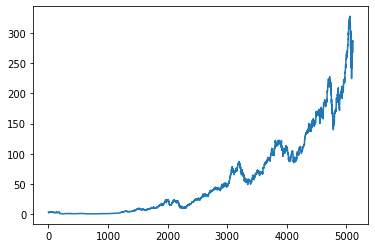

In [7]:
plot('AAPL', 'Adj Close')

Plot high prices of IBM

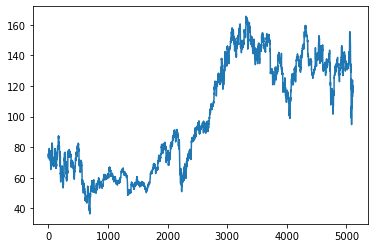

In [8]:
plot('IBM', 'Adj Close')

Joining two data frames

In [9]:
def get_date_adj_close(symbol):
    return pd.read_csv("data/{}.csv".format(symbol),
                         index_col="Date",
                         parse_dates=True,
                         usecols=['Date', 'Adj Close'],
                         na_values=['nan'])

In [10]:
def get_df_date_range(start_date, end_date, symbol, drop_na=True):
    dates = pd.date_range(start_date, end_date)
    #create empty data frame
    df = pd.DataFrame(index=dates)
    #read original file
    df_tmp = get_date_adj_close(symbol)
    #join the dataframes
    df = df.join(df_tmp, how='inner')
    #drop nan values
    if drop_na:
        df = df.dropna()
    return df
    

In [11]:
print(get_df_date_range('2010-01-22', '2010-01-26', 'SPY'))

            Adj Close
2010-01-22  88.892502
2010-01-25  89.348351
2010-01-26  88.973915


In [12]:
def combine_symbols_spy(symbols):
    df_spy = get_df_date_range('2010-01-22', '2010-01-26', 'SPY', False)
    df_spy.rename(columns={'Adj Close':'SPY'})
    for symbol in symbols:
        df_temp = get_date_adj_close(symbol)
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df_spy=df_spy.join(df_temp) # default join is left
    return df_spy

In [13]:
print(combine_symbols_spy(['GOOG', 'IBM', 'GLD']).head())

            Adj Close        GOOG        IBM         GLD
2010-01-22  88.892502  273.978058  90.957825  107.169998
2010-01-25  89.348351  268.991760  91.407166  107.480003
2010-01-26  88.973915  270.197235  91.139023  107.559998
